In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

In [3]:
raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [4]:
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1
84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1


In [9]:
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,금요일,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,차도
1,5,수요일,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,식당
2,5,월요일,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
3,11,화요일,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
4,10,목요일,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,11,금요일,9,1138,31.0,2.500387,0.000000,0.0,0.0,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
17285,3,월요일,1,148,9.0,2.234593,0.000000,0.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
17286,10,금요일,9,2347,53.0,0.360005,6.857143,0.0,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지
17287,9,목요일,4,548,13.0,3.993724,0.000000,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        84406 non-null  int64  
 1   요일       84406 non-null  object 
 2   시간       84406 non-null  int64  
 3   소관경찰서    84406 non-null  int64  
 4   소관지역     84406 non-null  float64
 5   사건발생거리   84406 non-null  float64
 6   강수량(mm)  84406 non-null  float64
 7   강설량(mm)  84406 non-null  float64
 8   적설량(cm)  84406 non-null  float64
 9   풍향       84406 non-null  float64
 10  안개       84406 non-null  float64
 11  짙은안개     84406 non-null  float64
 12  번개       84406 non-null  float64
 13  진눈깨비     84406 non-null  float64
 14  서리       84406 non-null  float64
 15  연기/연무    84406 non-null  float64
 16  눈날림      84406 non-null  float64
 17  범죄발생지    84406 non-null  object 
 18  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(2)
memory usage: 12.2+ MB


- target : {0 : 강도, 1 : 절도, 2 : 상해}

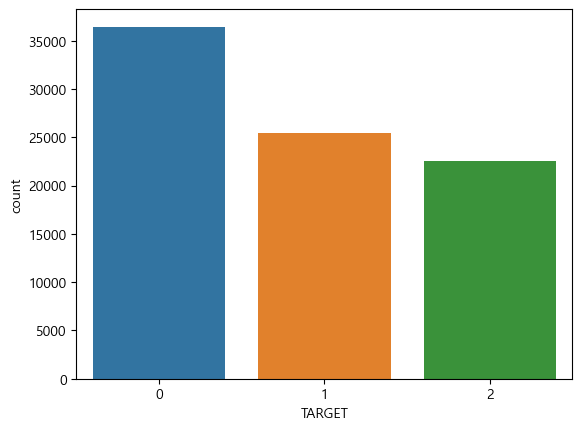

In [7]:
sns.countplot(x=raw_df['TARGET'], data = raw_df);

In [8]:
column_list_Category = []
column_list_continuous = []

for num in range(len(raw_df.columns)):
    if str(raw_df.dtypes[num]) == "object":
        column_list_Category.append(str(raw_df.columns[num]))
    else:
        column_list_continuous.append(str(raw_df.columns[num]))

In [9]:
column_list_Category

['요일', '범죄발생지']

In [10]:
column_list_continuous

['월',
 '시간',
 '소관경찰서',
 '소관지역',
 '사건발생거리',
 '강수량(mm)',
 '강설량(mm)',
 '적설량(cm)',
 '풍향',
 '안개',
 '짙은안개',
 '번개',
 '진눈깨비',
 '서리',
 '연기/연무',
 '눈날림',
 'TARGET']

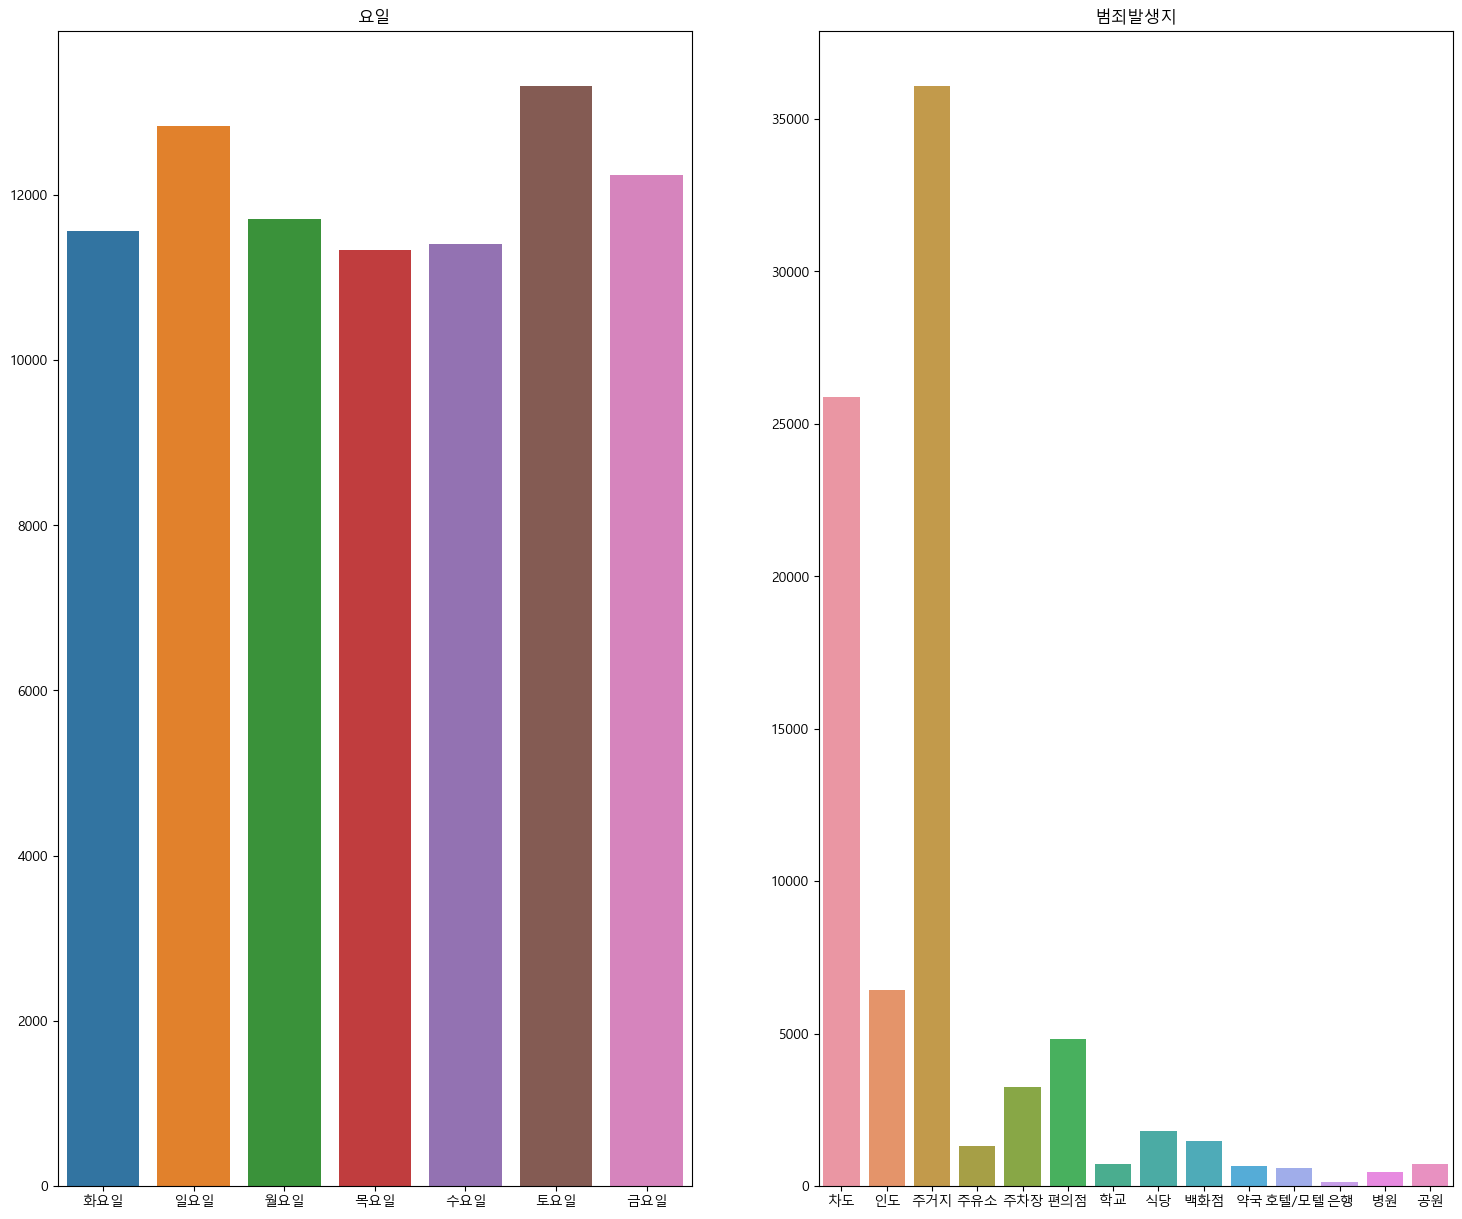

In [24]:
plt.figure(figsize=(18,15))

for num in range(0, 2):
    plt.subplot(1,2, (num+1) )
    sns.countplot(x=raw_df[column_list_Category[num]], data = raw_df);
    plt.xlabel("")
    plt.ylabel("")
    plt.title(column_list_Category[num])

In [19]:
raw_df.iloc[:, -4:]

,연기/연무,눈날림,범죄발생지,TARGET
0,0.0,0.0,차도,2
1,0.0,0.0,차도,0
2,1.0,0.0,인도,1
3,0.0,0.0,주거지,1
4,0.0,0.0,주유소,2
...,...,...,...,...
84401,0.0,0.0,차도,1
84402,1.0,0.0,차도,0
84403,0.0,0.0,차도,0
84404,1.0,0.0,주거지,1


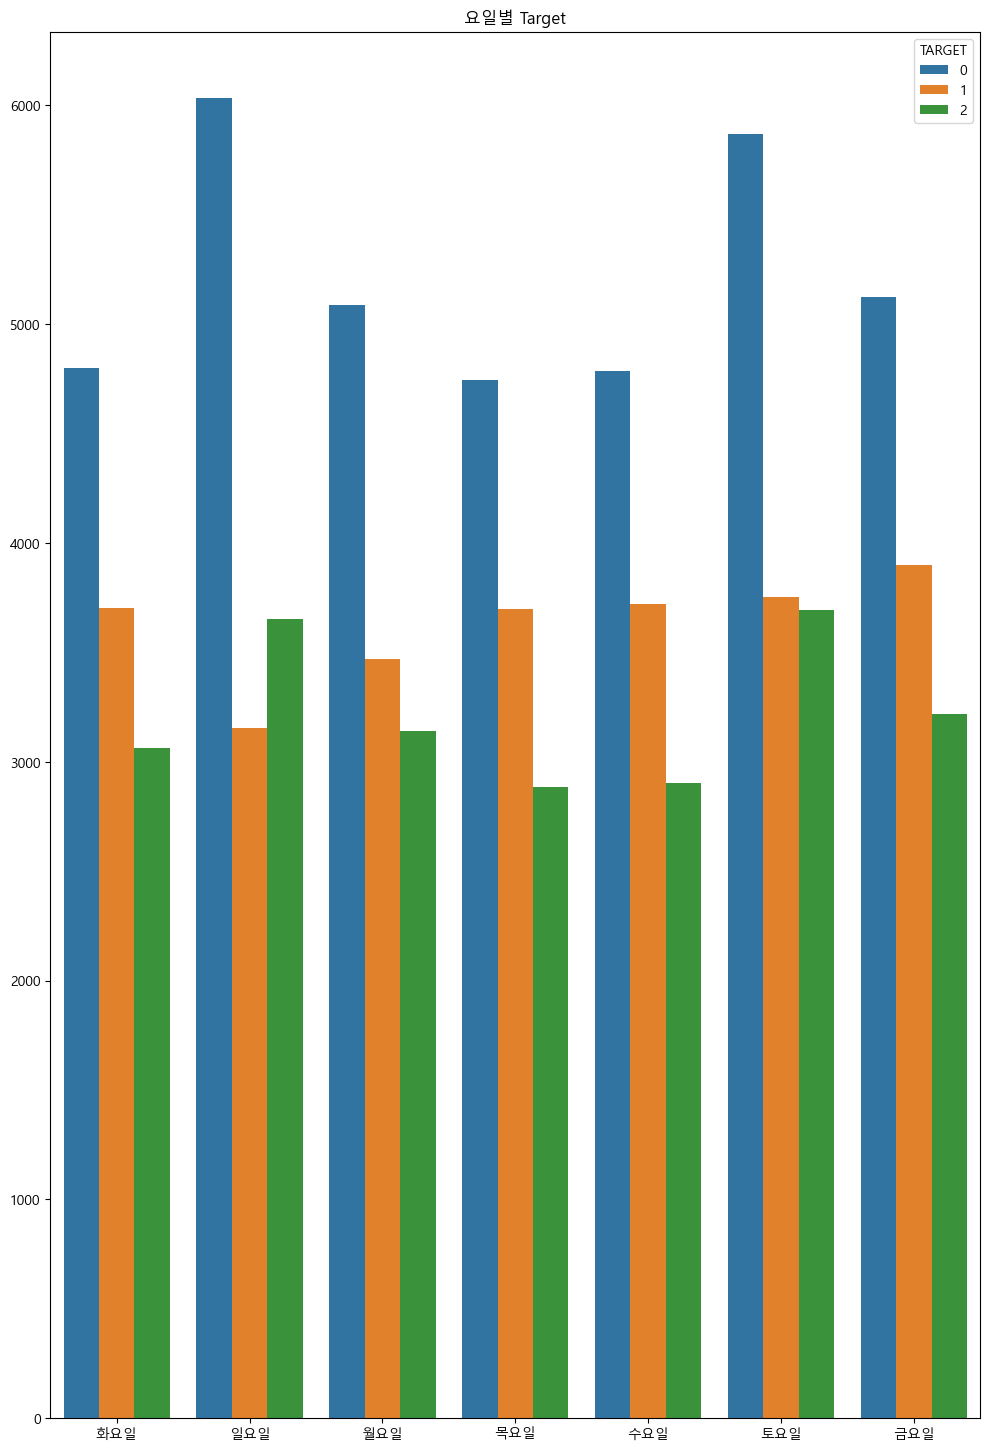

In [27]:
plt.figure(figsize=(12, 18))
sns.countplot(x=raw_df["요일"], data = raw_df,    hue=raw_df["TARGET"]);
plt.xlabel("")
plt.ylabel("")
plt.title("요일별 Target"); # 일요일에만 상해가 절도보다 높은 수치를 보임

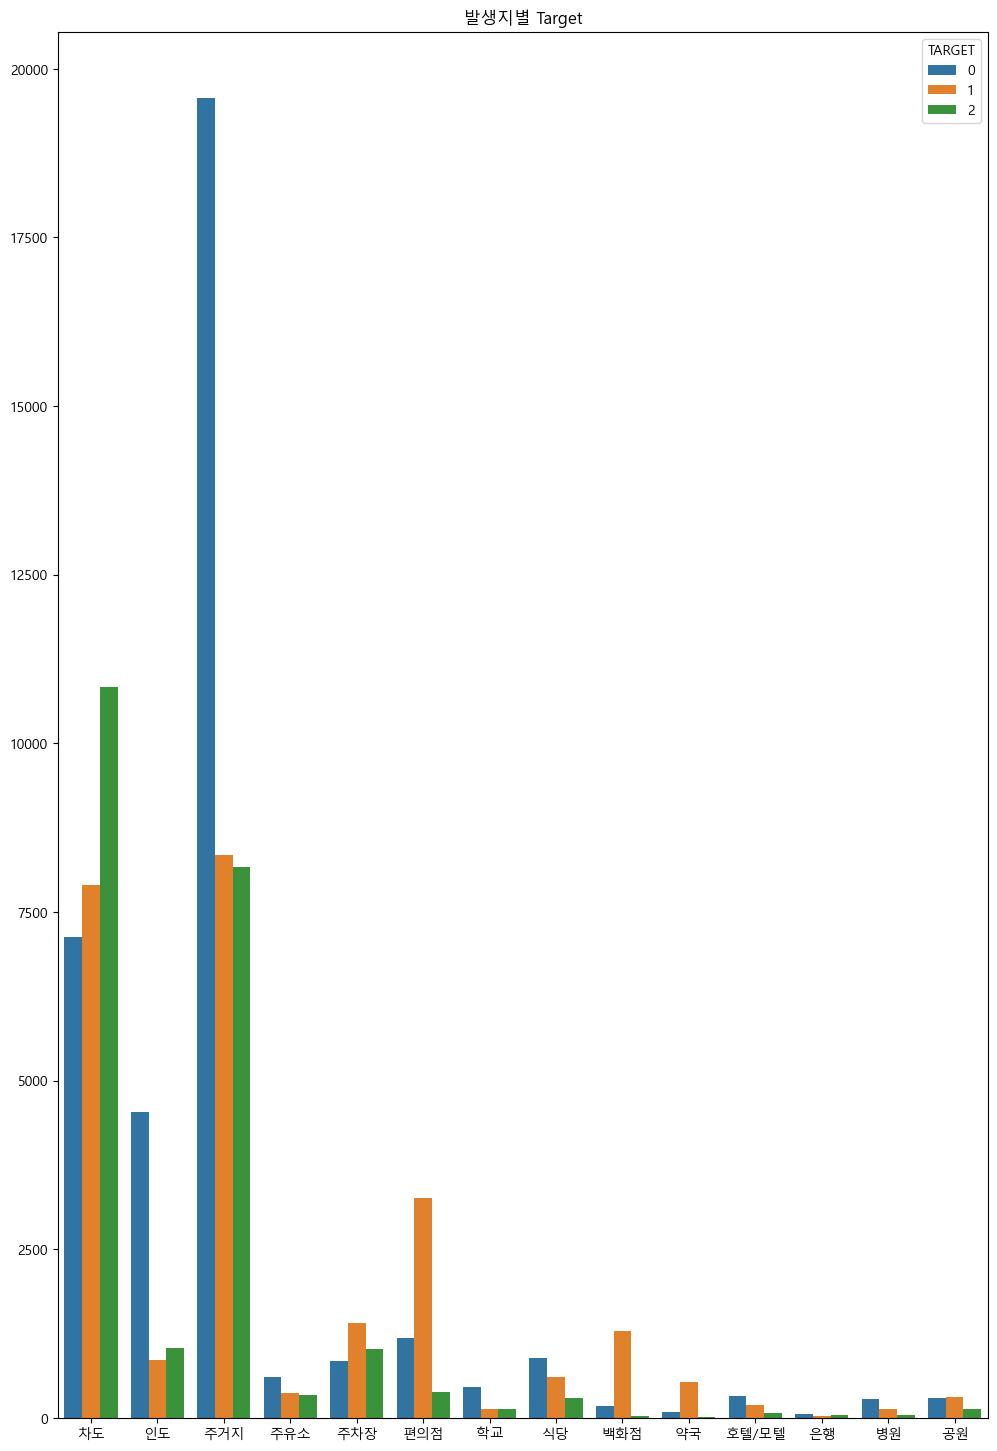

In [29]:
plt.figure(figsize=(12, 18))
sns.countplot(x=raw_df["범죄발생지"], data = raw_df,    hue=raw_df["TARGET"]);
plt.xlabel("")
plt.ylabel("")
plt.title("발생지별 Target"); # 일요일에만 상해가 절도보다 높은 수치를 보임

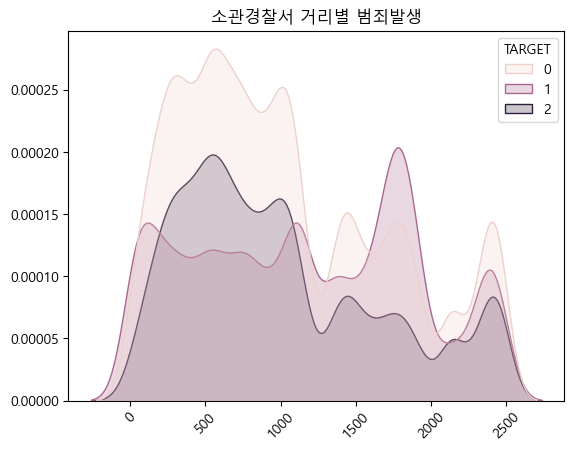

In [33]:
warnings.filterwarnings(action="ignore")
sns.kdeplot(data=raw_df, x = raw_df["소관경찰서"], hue="TARGET",shade = True, color= "olive");
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("")
plt.title("소관경찰서 거리별 범죄발생");

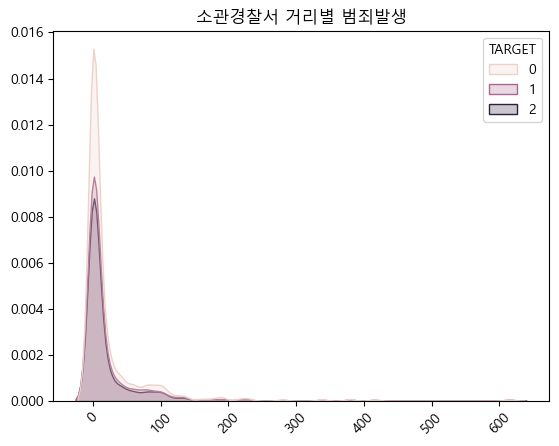

In [34]:
warnings.filterwarnings(action="ignore")
sns.kdeplot(data=raw_df, x = raw_df["강수량(mm)"], hue="TARGET",shade = True, color= "olive");
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("")
plt.title("소관경찰서 거리별 범죄발생");

In [38]:
raw_df[raw_df['강수량(mm)']>100]['TARGET'].value_counts()

0    2574
1    1668
2    1458
Name: TARGET, dtype: int64

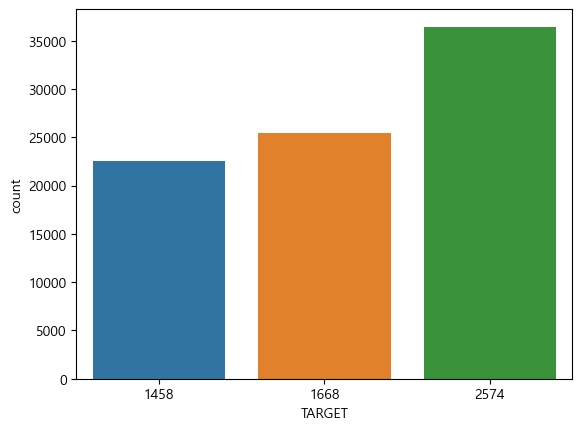

In [39]:
sns.countplot(x=raw_df['TARGET'], data = raw_df[raw_df['강수량(mm)']>100]['TARGET'].value_counts());

In [40]:
raw_df["번개"].value_counts()

0.0    72248
1.0    12158
Name: 번개, dtype: int64

In [42]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [118]:
x = raw_df.drop(columns="TARGET")
y = raw_df[["TARGET"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=13)

In [119]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(67524, 18) (67524, 1) (16882, 18) (16882, 1)


In [54]:
# 범주형 자료의 value_count 확인을 통해 이상치 값 확인

for name in ['강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', \
             '연기/연무', '눈날림',]:
    print(name)
    print(raw_df[name].value_counts())
    print("=" * 50)

강수량(mm)
0.000000      39439
1.000000       2443
0.625000       1597
0.857143        792
3.500000        599
              ...  
3.750000        163
107.875000      156
186.142857      141
35.166667       128
186.833333      125
Name: 강수량(mm), Length: 156, dtype: int64
강설량(mm)
0.000000      77758
8.250000        478
15.800000       242
1.250000        238
11.400000       231
18.750000       225
1.500000        223
16.285714       217
35.000000       216
6.600000        212
8.600000        207
5.750000        203
12.833333       200
3.600000        196
4.285714        196
12.000000       191
7.666667        190
45.500000       190
72.500000       188
6.571429        186
2.571429        180
25.500000       179
62.250000       175
10.200000       172
34.000000       170
17.800000       170
40.750000       170
26.800000       167
8.285714        165
19.800000       163
1.857143        158
103.000000      156
188.000000      141
66.750000       128
295.000000      125
Name: 강설량(mm), dtype: i

In [120]:
x_train["안개"] = x_train["안개"].astype("int")
x_train["짙은안개"] = x_train["짙은안개"].astype("int")
x_train["번개"] = x_train["번개"].astype("int")
x_train["진눈깨비"] = x_train["진눈깨비"].astype("int")
x_train["연기/연무"] = x_train["연기/연무"].astype("int")
x_train["눈날림"] = x_train["눈날림"].astype("int")
x_train["서리"] = x_train["서리"].astype("int")

x_test["안개"] = x_test["안개"].astype("int")
x_test["짙은안개"] = x_test["짙은안개"].astype("int")
x_test["번개"] = x_test["번개"].astype("int")
x_test["진눈깨비"] = x_test["진눈깨비"].astype("int")
x_test["연기/연무"] = x_test["연기/연무"].astype("int")
x_test["눈날림"] = x_test["눈날림"].astype("int")
x_test["서리"] = x_test["서리"].astype("int")

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67524 entries, 77217 to 76574
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        67524 non-null  int64  
 1   요일       67524 non-null  int32  
 2   시간       67524 non-null  int64  
 3   소관경찰서    67524 non-null  int64  
 4   소관지역     67524 non-null  float64
 5   사건발생거리   67524 non-null  float64
 6   강수량(mm)  67524 non-null  float64
 7   강설량(mm)  67524 non-null  float64
 8   적설량(cm)  67524 non-null  float64
 9   풍향       67524 non-null  float64
 10  안개       67524 non-null  int32  
 11  짙은안개     67524 non-null  int32  
 12  번개       67524 non-null  int32  
 13  진눈깨비     67524 non-null  int32  
 14  서리       67524 non-null  int32  
 15  연기/연무    67524 non-null  int32  
 16  눈날림      67524 non-null  int32  
 17  범죄발생지    67524 non-null  int32  
dtypes: float64(6), int32(9), int64(3)
memory usage: 7.5 MB


In [68]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["안개","짙은안개","번개","진눈깨비", "서리", "연기/연무", "눈날림", "월", "요일", "시간"],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0893382	test: 1.0893382	test1: 1.0894646	best: 1.0894646 (0)	total: 651ms	remaining: 32m 31s
100:	learn: 0.9644156	test: 0.9667692	test1: 0.9754412	best: 0.9754412 (100)	total: 36.7s	remaining: 17m 32s
200:	learn: 0.9493129	test: 0.9572021	test1: 0.9712286	best: 0.9712286 (200)	total: 1m 13s	remaining: 16m 59s
300:	learn: 0.9321162	test: 0.9480434	test1: 0.9688560	best: 0.9688560 (300)	total: 1m 52s	remaining: 16m 47s
400:	learn: 0.9053466	test: 0.9301754	test1: 0.9665178	best: 0.9664875 (394)	total: 2m 34s	remaining: 16m 41s
500:	learn: 0.8812669	test: 0.9154712	test1: 0.9659785	best: 0.9659400 (484)	total: 3m 17s	remaining: 16m 23s
600:	learn: 0.8595119	test: 0.9022330	test1: 0.9658806	best: 0.9657589 (568)	total: 4m	remaining: 16m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9657589396
bestIteration = 568

Shrink model to first 569 iterations.
0.547980097144888
CPU times: total: 8min 30s
Wall time: 4min 10s


In [72]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["안개","짙은안개","번개","진눈깨비", "서리", "연기/연무", "눈날림", "월", "요일", "시간"],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0895192	test: 1.0895192	test1: 1.0896449	best: 1.0896449 (0)	total: 245ms	remaining: 12m 14s
100:	learn: 0.9637054	test: 0.9651565	test1: 0.9737151	best: 0.9737151 (100)	total: 30.3s	remaining: 14m 28s
200:	learn: 0.9481975	test: 0.9556197	test1: 0.9699960	best: 0.9699960 (200)	total: 1m 5s	remaining: 15m 10s
300:	learn: 0.9320628	test: 0.9468393	test1: 0.9678640	best: 0.9678640 (300)	total: 1m 40s	remaining: 14m 56s
400:	learn: 0.9093321	test: 0.9309951	test1: 0.9658094	best: 0.9657937 (396)	total: 2m 16s	remaining: 14m 45s
500:	learn: 0.8896863	test: 0.9190221	test1: 0.9651206	best: 0.9650998 (497)	total: 2m 53s	remaining: 14m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9650685432
bestIteration = 507

Shrink model to first 508 iterations.
0.5470323421395569
CPU times: total: 5min 25s
Wall time: 3min 15s


In [80]:
(cat_report["f1-score"][0] + cat_report["f1-score"][1] + cat_report["f1-score"][2]) / 3

0.5185259904521101

In [82]:
for result in zip(cat.feature_importances_, x_train.columns):
    print(result)

(9.725318205038393, '월')
(9.06885225756425, '요일')
(10.016660469578161, '시간')
(12.981819908846665, '소관경찰서')
(8.446405047039294, '소관지역')
(6.479775866143516, '사건발생거리')
(3.831023215648107, '강수량(mm)')
(0.41417534473971734, '강설량(mm)')
(0.8053724536354893, '적설량(cm)')
(4.3736047999507965, '풍향')
(0.8336152369918383, '안개')
(0.07577671575185602, '짙은안개')
(0.1665751893926012, '번개')
(0.07025284331646933, '진눈깨비')
(0.0702030340378076, '서리')
(0.9381364451666409, '연기/연무')
(0.012689352816149824, '눈날림')
(31.6897436143423, '범죄발생지')


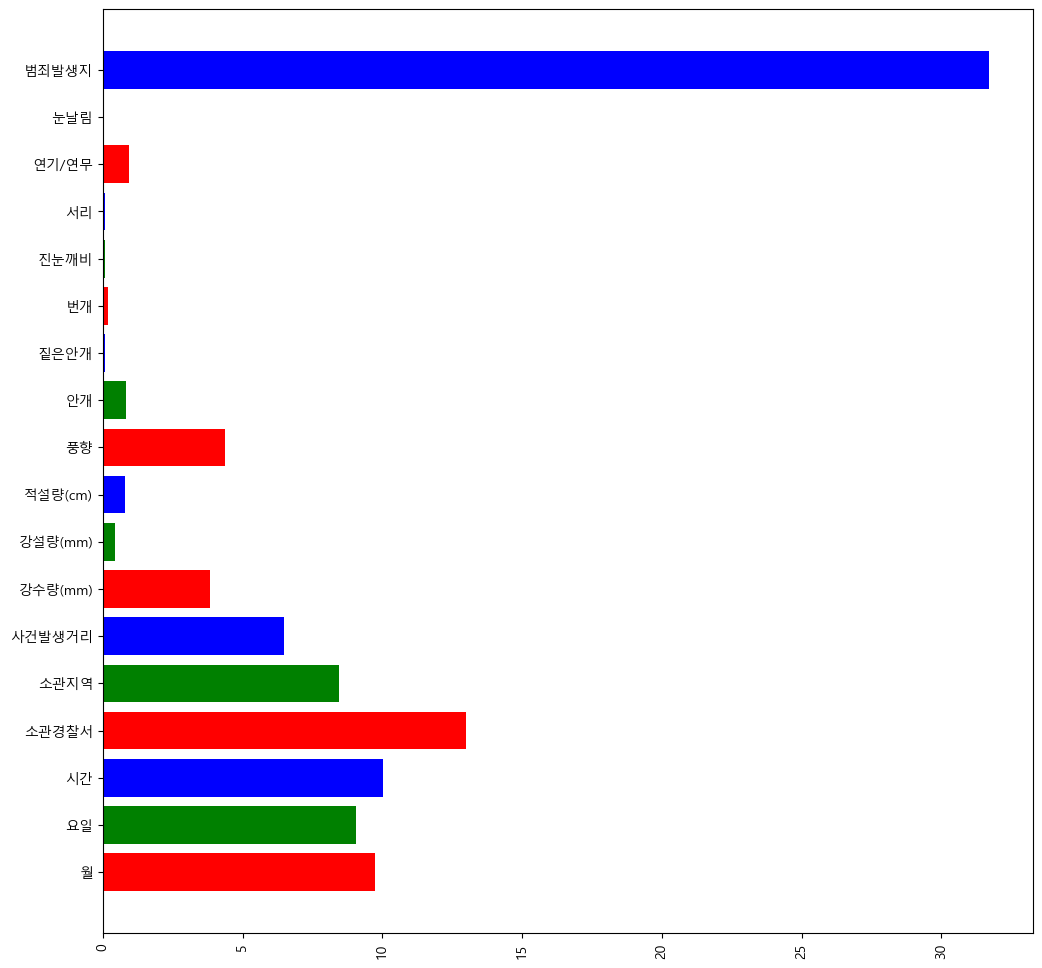

In [84]:
plt.figure(figsize=(12, 12))
plt.barh(x_train.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [88]:
# lgbm
lg_model = LGBMClassifier()
params = {
    "n_estimators" : [100, 500, 1000, 2000],
    'application' : ['multiclass'],
    "max_depth" : [3, 5, 7, 9],
    "random_state" : [13], 
    "learning_rate" : [0.0001]
}
lg_grid = GridSearchCV(lg_model, param_grid=params, cv=5, scoring="accuracy")
lg_grid.fit(x_train, y_train)
pred = lg_grid.predict(x_test)
acc.append(accuracy_score(y_test, pred))
lg_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

NameError: name 'acc' is not defined

In [89]:
accuracy_score(y_test, pred)

0.45581092287643643

In [ ]:
def print_modeling(x_train, x_test, y_train, y_test):
    dc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xb = XGBClassifier()
    lg = LGBMClassifier()
    
    acc = []
    
    
    #DecisionTreeClassifier
    params = {
        "max_depth" : [3, 5, 7, 9, 11],
        'random_state' : [13],
    }
    dc_grid_model = GridSearchCV(dc, param_grid=params, cv = 5, scoring='accuracy')
    dc_grid_model.fit(x_train, y_train)
    pred = dc_grid_model.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    
    dc_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
        
    # RandomForest
    params = {
        "n_estimators" : [100, 500, 1000, 1500, 2000],
        "max_depth" : [3, 5, 7 ,9],
        "random_state" : [13]
    }
    rf_grid = GridSearchCV(rf, param_grid=params, cv=5, scoring="accuracy")
    rf_grid.fit(x_train, y_train)
    pred = rf_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    rf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    # xgbcBoost
    params = {
        "n_estimators" : [100, 500, 1000, 1500, 2000],
        "max_depth" : [3, 5, 7 ,9],
        "random_state" : [13],
        "learning_rate" : [0.001, 0.0001]
    }
    xb_grid = GridSearchCV(xb, param_grid=params, cv=5, scoring="accuracy")
    xb_grid.fit(x_train, y_train)
    pred = xb_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    xb_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    # lgbm
    lg_model = LGBMClassifier()
    params = {
        "n_estimators" : [100, 500, 1000, 2000],
        'application' : ['multiclass'],
        "boosting" : ["gdbt", "dart", "goss"]
        "max_depth" : [3, 5, 7, 9],
        "random_state" : [13],
        "learning_rate" : [0.0001]
    }
    lg_grid = GridSearchCV(lg_model, param_grid=params, cv=5, scoring="accuracy")
    lg_grid.fit(x_train, y_train)
    pred = lg_grid.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    lg_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
    
    
    df = pd.DataFrame(data={"accuracy" : acc})
    df.rename(index={0 : "Decision", 1 : 'Randomforest', 2 : "XGBC", 3 : 'LGBMC'}, inplace = True)
    return df, dc_report, rf_report, xb_report, lg_report

In [ ]:
%%time
result, dc_confusion, rf_confusion, xb_confusion, lg_confusion  = print_modeling(x_train, x_test, y_train, y_test)
result

In [ ]:
xb_confusion

In [ ]:
lg_confusion

In [90]:
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,0,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10
1,5,2,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
2,5,3,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,11,6,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,10,1,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,11,0,9,1138,31.0,2.500387,0.000000,0.0,0.0,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
17285,3,3,1,148,9.0,2.234593,0.000000,0.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17286,10,0,9,2347,53.0,0.360005,6.857143,0.0,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17287,9,1,4,548,13.0,3.993724,0.000000,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [93]:
test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")

In [94]:
pred = cat.predict(test_df)

In [95]:
pred

array([[2],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [96]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"

In [97]:
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

In [99]:
submit.to_csv('submit_20230522_1.csv', index = False)

In [121]:
x_train = x_train[["월", "요일", "시간", '범죄발생지', '연기/연무', '풍향', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)']]

In [122]:
x_test = x_test[["월", "요일", "시간", '범죄발생지', '연기/연무', '풍향', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)']]

In [123]:
x_test

,월,요일,시간,범죄발생지,연기/연무,풍향,소관경찰서,소관지역,사건발생거리,강수량(mm)
57078,7,3,3,10,0,235.0,640,20.0,1.234608,0.000000
34360,5,1,6,9,0,20.0,150,9.0,3.791296,20.000000
34900,1,0,1,4,0,135.0,1749,46.0,2.478779,0.000000
11160,8,1,5,10,1,120.0,2446,33.0,1.986347,3.250000
18849,9,6,12,10,0,60.0,836,16.0,4.196122,0.000000
...,...,...,...,...,...,...,...,...,...,...
81344,4,3,12,7,0,220.0,2440,39.0,2.293093,0.555556
15792,3,4,7,10,0,30.0,926,28.0,1.870723,0.000000
8228,8,4,9,7,1,40.0,1829,50.0,1.845629,0.000000
36742,9,0,11,7,0,135.0,48,8.0,1.137333,1.625000


In [124]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["연기/연무", "월", "요일", "시간"],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0897228	test: 1.0897228	test1: 1.0898202	best: 1.0898202 (0)	total: 319ms	remaining: 15m 57s
100:	learn: 0.9596994	test: 0.9618413	test1: 0.9729861	best: 0.9729861 (100)	total: 39.9s	remaining: 19m 5s
200:	learn: 0.9446806	test: 0.9530296	test1: 0.9694219	best: 0.9694219 (200)	total: 1m 17s	remaining: 18m 4s
300:	learn: 0.9303456	test: 0.9453793	test1: 0.9672513	best: 0.9672513 (300)	total: 1m 59s	remaining: 17m 55s
400:	learn: 0.9079490	test: 0.9306026	test1: 0.9654646	best: 0.9654646 (400)	total: 2m 43s	remaining: 17m 38s
500:	learn: 0.8892742	test: 0.9191617	test1: 0.9651080	best: 0.9650459 (478)	total: 3m 27s	remaining: 17m 17s
600:	learn: 0.8727618	test: 0.9096557	test1: 0.9648528	best: 0.9648528 (600)	total: 4m 12s	remaining: 16m 46s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9646625828
bestIteration = 648

Shrink model to first 649 iterations.
0.548276270584054
CPU times: total: 10min 20s
Wall time: 4min 55s


In [125]:
0.548276270584054 > 0.5470323421395569

True

In [129]:
x_test

,월,요일,시간,범죄발생지,연기/연무,풍향,소관경찰서,소관지역,사건발생거리,강수량(mm)
57078,7,3,3,10,0,235.0,640,20.0,1.234608,0.000000
34360,5,1,6,9,0,20.0,150,9.0,3.791296,20.000000
34900,1,0,1,4,0,135.0,1749,46.0,2.478779,0.000000
11160,8,1,5,10,1,120.0,2446,33.0,1.986347,3.250000
18849,9,6,12,10,0,60.0,836,16.0,4.196122,0.000000
...,...,...,...,...,...,...,...,...,...,...
81344,4,3,12,7,0,220.0,2440,39.0,2.293093,0.555556
15792,3,4,7,10,0,30.0,926,28.0,1.870723,0.000000
8228,8,4,9,7,1,40.0,1829,50.0,1.845629,0.000000
36742,9,0,11,7,0,135.0,48,8.0,1.137333,1.625000


In [132]:
test_df = test_df[["월", "요일", "시간", '범죄발생지', '연기/연무', '풍향', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)']]

In [133]:
pred = cat.predict(test_df)

In [134]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

In [135]:
submit.to_csv('submit_20230522_2.csv', index = False)

# 원핫인코딩, PCA Clustring overSampling

In [24]:
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1
84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1


In [25]:
raw_df.isnull().sum()

월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64

In [26]:
raw_df[raw_df.duplicated()]

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
20013,6,화요일,9,1926,44.0,1.172868,61.800000,0.00,0.000000,315.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,주거지,2
25887,12,목요일,12,2438,34.0,2.511557,0.500000,0.00,0.000000,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
34339,5,토요일,1,2138,25.0,2.067681,50.444444,0.00,0.000000,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
35304,4,월요일,12,838,18.0,2.545344,3.250000,0.00,0.000000,265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
35585,4,토요일,8,628,20.0,0.384635,0.000000,0.00,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
36660,10,화요일,12,2348,52.0,1.275159,229.750000,0.00,0.000000,240.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,1
37195,9,금요일,4,1146,32.0,1.120603,1.625000,0.00,0.000000,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,1
37835,4,수요일,6,236,9.0,0.844076,21.888889,0.00,0.000000,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,주거지,1
37932,10,토요일,1,136,8.0,2.387026,4.875000,0.00,0.000000,285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주거지,0
39073,2,금요일,3,2447,41.0,0.897236,1.857143,0.00,156.600000,150.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,주거지,1


In [27]:
raw_df[(raw_df['월']==6) & (raw_df["요일"]=='화요일') & (raw_df["시간"]==9) & (raw_df['소관경찰서']==1926)]

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
16581,6,화요일,9,1926,44.0,1.172868,61.8,0.0,0.0,315.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,주거지,2
20013,6,화요일,9,1926,44.0,1.172868,61.8,0.0,0.0,315.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,주거지,2


In [36]:
raw_df.drop_duplicates(keep='first', inplace=True)
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,1
84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도,0
84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지,1


In [37]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [38]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")

In [39]:
test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")

In [40]:
x_train = raw_df.drop(columns=["TARGET"])
y_train = raw_df[["TARGET"]]

In [41]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
early_stopping_rounds=50, cat_features=["안개","짙은안개","번개","진눈깨비", "서리", "연기/연무", "눈날림", "월", "요일", "시간"],
verbose=100)

pred = cat.predict(test_df)

0:	learn: 1.0894969	total: 575ms	remaining: 28m 44s
100:	learn: 0.9626147	total: 40.7s	remaining: 19m 28s
200:	learn: 0.9498722	total: 1m 22s	remaining: 19m 5s
300:	learn: 0.9366175	total: 2m 4s	remaining: 18m 33s
400:	learn: 0.9179526	total: 2m 49s	remaining: 18m 21s
500:	learn: 0.9013850	total: 3m 35s	remaining: 17m 53s
600:	learn: 0.8866042	total: 4m 20s	remaining: 17m 19s
700:	learn: 0.8715861	total: 5m 5s	remaining: 16m 42s
800:	learn: 0.8590362	total: 5m 51s	remaining: 16m 4s
900:	learn: 0.8471009	total: 6m 36s	remaining: 15m 23s
1000:	learn: 0.8341176	total: 7m 23s	remaining: 14m 45s
1100:	learn: 0.8220804	total: 8m 10s	remaining: 14m 5s
1200:	learn: 0.8109265	total: 8m 57s	remaining: 13m 25s
1300:	learn: 0.7996089	total: 9m 45s	remaining: 12m 44s
1400:	learn: 0.7885277	total: 10m 31s	remaining: 12m 1s
1500:	learn: 0.7771910	total: 11m 17s	remaining: 11m 16s
1600:	learn: 0.7650854	total: 12m 1s	remaining: 10m 30s
1700:	learn: 0.7523157	total: 12m 49s	remaining: 9m 47s
1800:	lear

In [43]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230523_1.csv', index = False)

In [44]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='Bernoulli')
cat.fit(x_train, y_train,
early_stopping_rounds=50, cat_features=["안개","짙은안개","번개","진눈깨비", "서리", "연기/연무", "눈날림", "월", "요일", "시간"],
verbose=100)

pred = cat.predict(test_df)

0:	learn: 1.0897710	total: 315ms	remaining: 15m 43s
100:	learn: 0.9652587	total: 35s	remaining: 16m 44s
200:	learn: 0.9512477	total: 1m 11s	remaining: 16m 36s
300:	learn: 0.9386956	total: 1m 50s	remaining: 16m 33s
400:	learn: 0.9172191	total: 2m 34s	remaining: 16m 44s
500:	learn: 0.8969459	total: 3m 18s	remaining: 16m 28s
600:	learn: 0.8784848	total: 4m	remaining: 15m 58s
700:	learn: 0.8600513	total: 4m 44s	remaining: 15m 32s
800:	learn: 0.8427460	total: 5m 29s	remaining: 15m 3s
900:	learn: 0.8263492	total: 6m	remaining: 14m
1000:	learn: 0.8096249	total: 6m 31s	remaining: 13m
1100:	learn: 0.7949299	total: 7m	remaining: 12m 5s
1200:	learn: 0.7793452	total: 7m 30s	remaining: 11m 14s
1300:	learn: 0.7648829	total: 7m 57s	remaining: 10m 24s
1400:	learn: 0.7498779	total: 8m 28s	remaining: 9m 40s
1500:	learn: 0.7349591	total: 8m 58s	remaining: 8m 57s
1600:	learn: 0.7210415	total: 9m 25s	remaining: 8m 14s
1700:	learn: 0.7076425	total: 9m 54s	remaining: 7m 34s
1800:	learn: 0.6943304	total: 10m 

In [45]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230523_2.csv', index = False)

In [46]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,6,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0,0,0,0,0,0,0,10
1,11,6,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0,0,0,0,0,0,0,10
2,8,4,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1,0,0,0,0,1,0,6
3,5,3,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1,1,0,0,0,0,0,7
4,9,4,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,4,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1,0,0,0,0,0,0,10
84402,8,1,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0,0,0,0,0,1,0,10
84403,7,4,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0,0,0,0,0,0,0,10
84404,1,6,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1,1,0,0,0,1,0,7


In [47]:
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,0,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,1,0,1,0,0,0,0,10
1,5,2,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1,0,0,0,0,1,0,3
2,5,3,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,1,0,0,0,0,0,0,7
3,11,6,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0,0,0,0,0,0,0,7
4,10,1,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,1,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,11,0,9,1138,31.0,2.500387,0.000000,0.0,0.0,345.0,0,0,0,0,0,0,0,10
17285,3,3,1,148,9.0,2.234593,0.000000,0.0,0.0,270.0,0,0,0,0,0,0,0,7
17286,10,0,9,2347,53.0,0.360005,6.857143,0.0,0.0,340.0,0,0,0,0,0,0,0,7
17287,9,1,4,548,13.0,3.993724,0.000000,0.0,0.0,110.0,0,0,0,0,0,0,0,7


# 구분선
---

In [4]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [5]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [6]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")

In [7]:
raw_df.drop_duplicates(keep='first', inplace=True)
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,6,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0,0,0,0,0,0,0,10,2
1,11,6,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0,0,0,0,0,0,0,10,0
2,8,4,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1,0,0,0,0,1,0,6,1
3,5,3,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1,1,0,0,0,0,0,7,1
4,9,4,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0,0,0,0,0,0,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,4,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1,0,0,0,0,0,0,10,1
84402,8,1,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0,0,0,0,0,1,0,10,0
84403,7,4,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0,0,0,0,0,0,0,10,0
84404,1,6,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1,1,0,0,0,1,0,7,1


In [8]:
x = raw_df.drop(columns="TARGET")
y = raw_df[["TARGET"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=13)

In [9]:
# Clustering
km = KMeans(n_clusters=10, random_state=13)
km_data = km.fit(x_train[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])
x_train['clustering'] = km_data.labels_
x_test['clustering'] = km_data.predict(x_test[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
x_train['clustering'].value_counts()

1    39196
0    15774
2     7851
3     1940
4      763
8      596
6      483
7      334
5      305
9      249
Name: clustering, dtype: int64

In [68]:
x_test['clustering'].value_counts()

1    9799
0    4015
2    1890
3     475
4     193
8     157
7     102
6     100
5      80
9      62
Name: clustering, dtype: int64

In [64]:
x_train = x_train.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림'])
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,연기/연무,범죄발생지,clustering
2401,3,2,11,1328,30.0,1.402795,0.000000,0.0,0.000000,210.0,0,6,1
46299,6,5,6,327,12.0,3.484841,83.428571,0.0,0.000000,340.0,1,10,2
52490,7,6,12,847,20.0,1.695852,0.000000,0.0,0.000000,220.0,0,10,1
60264,1,0,6,1048,32.0,1.388675,0.000000,0.0,8.333333,330.0,0,10,1
24706,4,2,2,46,7.0,0.251034,21.888889,0.0,0.000000,45.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83864,5,6,4,239,12.0,1.804381,4.125000,0.0,0.000000,165.0,0,3,1
29491,8,2,11,1149,29.0,1.637805,135.500000,0.0,0.000000,250.0,1,7,2
41752,4,4,12,246,9.0,2.854999,0.000000,0.0,0.000000,155.0,1,7,1
57233,8,2,4,650,21.0,2.247765,0.000000,0.0,0.000000,90.0,0,10,1


In [67]:
x_test = x_test.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림'])
x_test

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,연기/연무,범죄발생지,clustering
35016,5,6,12,1426,33.0,2.145889,1.000000,0.0,0.0,245.0,0,7,0
76648,6,3,3,127,8.0,0.740857,0.000000,0.0,0.0,350.0,0,7,1
73736,10,6,2,838,18.0,1.742963,70.250000,0.0,0.0,20.0,0,11,1
31887,11,6,4,1548,40.0,2.688957,0.000000,0.0,0.0,200.0,0,10,1
51935,7,5,6,247,9.0,1.797107,8.000000,0.0,0.0,100.0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51422,11,6,11,246,9.0,3.019679,0.857143,0.0,0.0,195.0,1,7,0
67666,8,6,3,748,17.0,2.666206,137.444444,0.0,0.0,290.0,1,7,2
530,4,0,10,239,12.0,1.356130,0.000000,0.0,0.0,220.0,0,10,1
54638,5,2,9,228,24.0,1.660217,217.125000,0.0,0.0,235.0,0,10,2


In [69]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["연기/연무", "월", "요일", "시간", 'clustering', '범죄발생지'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0890134	test: 1.0889750	test1: 1.0892092	best: 1.0892092 (0)	total: 316ms	remaining: 15m 47s
100:	learn: 0.9530023	test: 0.9573715	test1: 0.9695400	best: 0.9695400 (100)	total: 27.9s	remaining: 13m 20s
200:	learn: 0.9371337	test: 0.9490351	test1: 0.9665633	best: 0.9665633 (200)	total: 1m 1s	remaining: 14m 10s
300:	learn: 0.9214928	test: 0.9423431	test1: 0.9654753	best: 0.9654621 (294)	total: 1m 37s	remaining: 14m 37s
400:	learn: 0.8996187	test: 0.9298658	test1: 0.9639281	best: 0.9639281 (400)	total: 2m 17s	remaining: 14m 49s
500:	learn: 0.8817665	test: 0.9205680	test1: 0.9635578	best: 0.9634582 (470)	total: 3m 12s	remaining: 15m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9634581811
bestIteration = 470

Shrink model to first 471 iterations.
0.5481538552717359


In [ ]:
for result in zip(cat.feature_importances_, x_train.columns):
    print(result)

In [ ]:
plt.figure(figsize=(12, 12))
plt.barh(x_train.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [72]:
test_df['clustering'] = km_data.predict(test_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])

In [73]:
test_df = test_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림'])
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,연기/연무,범죄발생지,clustering
0,9,0,5,927,28.0,1.570654,19.625000,0.0,0.0,165.0,0,10,2
1,5,2,3,926,28.0,1.712457,21.444444,0.0,0.0,175.0,1,3,0
2,5,3,6,1437,33.0,0.447496,25.200000,0.0,0.0,290.0,0,7,0
3,11,6,1,1739,31.0,0.878585,0.000000,0.0,0.0,285.0,0,7,1
4,10,1,10,830,15.0,0.496423,26.142857,0.0,0.0,95.0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17284,11,0,9,1138,31.0,2.500387,0.000000,0.0,0.0,345.0,0,10,1
17285,3,3,1,148,9.0,2.234593,0.000000,0.0,0.0,270.0,0,7,1
17286,10,0,9,2347,53.0,0.360005,6.857143,0.0,0.0,340.0,0,7,1
17287,9,1,4,548,13.0,3.993724,0.000000,0.0,0.0,110.0,0,7,1


In [74]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,연기/연무,범죄발생지,clustering
2401,3,2,11,1328,30.0,1.402795,0.000000,0.0,0.000000,210.0,0,6,1
46299,6,5,6,327,12.0,3.484841,83.428571,0.0,0.000000,340.0,1,10,2
52490,7,6,12,847,20.0,1.695852,0.000000,0.0,0.000000,220.0,0,10,1
60264,1,0,6,1048,32.0,1.388675,0.000000,0.0,8.333333,330.0,0,10,1
24706,4,2,2,46,7.0,0.251034,21.888889,0.0,0.000000,45.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83864,5,6,4,239,12.0,1.804381,4.125000,0.0,0.000000,165.0,0,3,1
29491,8,2,11,1149,29.0,1.637805,135.500000,0.0,0.000000,250.0,1,7,2
41752,4,4,12,246,9.0,2.854999,0.000000,0.0,0.000000,155.0,1,7,1
57233,8,2,4,650,21.0,2.247765,0.000000,0.0,0.000000,90.0,0,10,1


In [75]:
pred = cat.predict(test_df)

In [76]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230523_3.csv', index = False)

(9.613508993436724, '월')
(9.395162985497295, '요일')
(10.17360015004303, '시간')
(13.518377634565901, '소관경찰서')
(9.230927560059046, '소관지역')
(6.001072573336396, '사건발생거리')
(3.0531896500479934, '강수량(mm)')
(0.61716984849384, '강설량(mm)')
(0.9645461730591545, '적설량(cm)')
(3.521968309028669, '풍향')
(1.1016072052759438, '연기/연무')
(26.99163997999602, '범죄발생지')
(5.817228937160042, 'clustering')


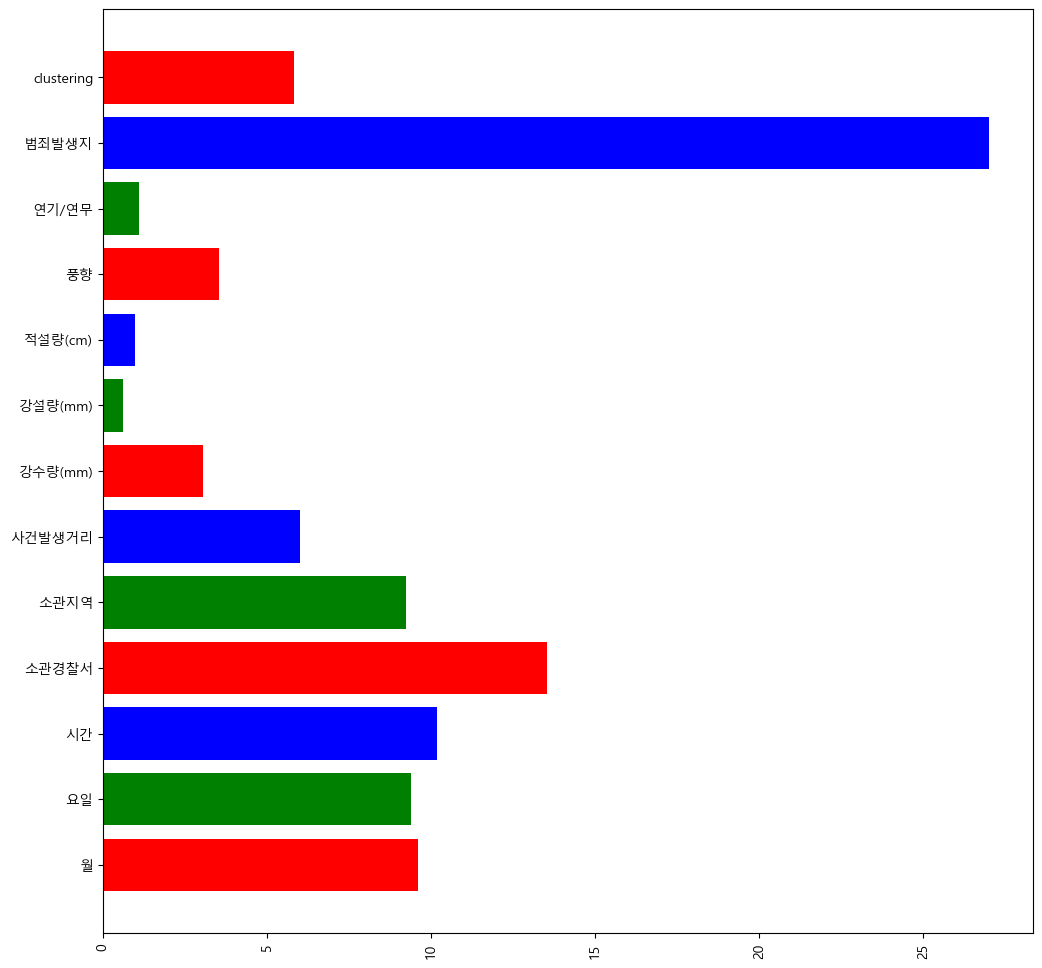

In [77]:
for result in zip(cat.feature_importances_, x_train.columns):
    print(result)

plt.figure(figsize=(12, 12))
plt.barh(x_train.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

# 적설, 강설, 연기/연무 빼고 해보기 + oversampling해보기
- **중요포인트** : 1, 2에 대한 f1-score를 높여서 평균값을 높여보자
- 그리고 전체 데이터셋을 통해 학습 시킨 후 예측한 결과 성능이 더 낮아지고, 그 이유를 과적합이라 생각

In [78]:
cat_report

,precision,recall,f1-score,support
0,0.565836,0.725950,0.635970,7287.000000
1,0.581727,0.433918,0.497067,5077.000000
2,0.469896,0.389443,0.425903,4509.000000
accuracy,0.548154,0.548154,0.548154,0.548154
macro avg,0.539153,0.516437,0.519647,16873.000000
weighted avg,0.544979,0.548154,0.538038,16873.000000


In [11]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,clustering
2401,3,2,11,1328,30.0,1.402795,0.000000,0.0,0.000000,210.0,0,0,0,0,0,0,0,6,1
46299,6,5,6,327,12.0,3.484841,83.428571,0.0,0.000000,340.0,1,0,1,0,0,1,0,10,2
52490,7,6,12,847,20.0,1.695852,0.000000,0.0,0.000000,220.0,0,0,0,0,0,0,0,10,1
60264,1,0,6,1048,32.0,1.388675,0.000000,0.0,8.333333,330.0,0,0,0,0,0,0,0,10,1
24706,4,2,2,46,7.0,0.251034,21.888889,0.0,0.000000,45.0,1,0,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83864,5,6,4,239,12.0,1.804381,4.125000,0.0,0.000000,165.0,0,0,0,0,0,0,0,3,1
29491,8,2,11,1149,29.0,1.637805,135.500000,0.0,0.000000,250.0,1,0,1,0,0,1,0,7,2
41752,4,4,12,246,9.0,2.854999,0.000000,0.0,0.000000,155.0,0,0,0,0,0,1,0,7,1
57233,8,2,4,650,21.0,2.247765,0.000000,0.0,0.000000,90.0,0,0,0,0,0,0,0,10,1


In [12]:
x_train = x_train.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])
x_train

x_test = x_test.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])
x_test

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering
35016,5,6,12,1426,33.0,2.145889,1.000000,245.0,7,0
76648,6,3,3,127,8.0,0.740857,0.000000,350.0,7,1
73736,10,6,2,838,18.0,1.742963,70.250000,20.0,11,1
31887,11,6,4,1548,40.0,2.688957,0.000000,200.0,10,1
51935,7,5,6,247,9.0,1.797107,8.000000,100.0,10,0
...,...,...,...,...,...,...,...,...,...,...
51422,11,6,11,246,9.0,3.019679,0.857143,195.0,7,0
67666,8,6,3,748,17.0,2.666206,137.444444,290.0,7,2
530,4,0,10,239,12.0,1.356130,0.000000,220.0,10,1
54638,5,2,9,228,24.0,1.660217,217.125000,235.0,10,2


In [14]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0887872	test: 1.0887116	test1: 1.0889193	best: 1.0889193 (0)	total: 680ms	remaining: 33m 59s
100:	learn: 0.9528435	test: 0.9574737	test1: 0.9695421	best: 0.9695421 (100)	total: 50s	remaining: 23m 55s
200:	learn: 0.9372311	test: 0.9501002	test1: 0.9664531	best: 0.9664519 (199)	total: 1m 50s	remaining: 25m 32s
300:	learn: 0.9196037	test: 0.9424143	test1: 0.9649750	best: 0.9649750 (300)	total: 2m 49s	remaining: 25m 21s
400:	learn: 0.8973819	test: 0.9303241	test1: 0.9638255	best: 0.9638126 (389)	total: 3m 51s	remaining: 24m 59s
500:	learn: 0.8806896	test: 0.9225304	test1: 0.9631993	best: 0.9631646 (483)	total: 4m 52s	remaining: 24m 18s
600:	learn: 0.8653530	test: 0.9151823	test1: 0.9630128	best: 0.9629862 (598)	total: 5m 51s	remaining: 23m 24s
700:	learn: 0.8483350	test: 0.9080482	test1: 0.9627364	best: 0.9627079 (698)	total: 6m 56s	remaining: 22m 46s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9627079053
bestIteration = 698

Shrink model to first 699 it

In [15]:
test_df['clustering'] = km_data.predict(test_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])

test_df = test_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering
0,9,0,5,927,28.0,1.570654,19.625000,165.0,10,2
1,5,2,3,926,28.0,1.712457,21.444444,175.0,3,0
2,5,3,6,1437,33.0,0.447496,25.200000,290.0,7,0
3,11,6,1,1739,31.0,0.878585,0.000000,285.0,7,1
4,10,1,10,830,15.0,0.496423,26.142857,95.0,7,0
...,...,...,...,...,...,...,...,...,...,...
17284,11,0,9,1138,31.0,2.500387,0.000000,345.0,10,1
17285,3,3,1,148,9.0,2.234593,0.000000,270.0,7,1
17286,10,0,9,2347,53.0,0.360005,6.857143,340.0,7,1
17287,9,1,4,548,13.0,3.993724,0.000000,110.0,7,1


In [16]:
pred = cat.predict(test_df)

url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230524_1.csv', index = False)

In [24]:
raw_df['소관지역'] = raw_df['소관지역'].astype('int')
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,6,10,137,8,2.611124,0.000000,0.0,0.00,245.0,0,0,0,0,0,0,0,10,2
1,11,6,6,438,13,3.209093,0.000000,0.0,0.00,200.0,0,0,0,0,0,0,0,10,0
2,8,4,6,1729,47,1.619597,0.000000,0.0,0.00,40.0,1,0,0,0,0,1,0,6,1
3,5,3,6,2337,53,1.921615,11.375000,0.0,0.00,225.0,1,1,0,0,0,0,0,7,1
4,9,4,11,1439,41,1.789721,0.000000,0.0,0.00,255.0,0,0,0,0,0,0,0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,4,7,336,11,3.808190,99.111111,0.0,0.00,165.0,1,0,0,0,0,0,0,10,1
84402,8,1,12,2149,38,1.458490,0.000000,0.0,0.00,200.0,0,0,0,0,0,1,0,10,0
84403,7,4,6,29,46,2.944913,105.888889,0.0,0.00,315.0,0,0,0,0,0,0,0,10,0
84404,1,6,11,536,25,0.493679,2.285714,8.6,10.75,330.0,1,1,0,0,0,1,0,7,1


In [28]:
gu_list = raw_df['소관지역'].unique()

In [31]:
for num in gu_list:
    print(raw_df[raw_df['소관지역']==num]["TARGET"].value_counts())

0    934
1    864
2    443
Name: TARGET, dtype: int64
0    1227
2     984
1     519
Name: TARGET, dtype: int64
1    514
0    241
2    152
Name: TARGET, dtype: int64
0    608
1    548
2    293
Name: TARGET, dtype: int64
0    1177
2     721
1     514
Name: TARGET, dtype: int64
1    523
0    329
2    203
Name: TARGET, dtype: int64
1    139
0    114
2     72
Name: TARGET, dtype: int64
1    1998
0    1063
2     490
Name: TARGET, dtype: int64
0    607
2    371
1    320
Name: TARGET, dtype: int64
0    1653
2    1214
1     682
Name: TARGET, dtype: int64
0    1501
2     938
1     610
Name: TARGET, dtype: int64
0    1416
2     934
1     627
Name: TARGET, dtype: int64
0    1922
2    1260
1     849
Name: TARGET, dtype: int64
0    1019
2     572
1     472
Name: TARGET, dtype: int64
0    1086
1     667
2     606
Name: TARGET, dtype: int64
0    1239
2     780
1     523
Name: TARGET, dtype: int64
1    1577
0    1421
2     872
Name: TARGET, dtype: int64
1    463
0    418
2    170
Name: TARGET, dtype: i

In [21]:
raw_df[raw_df["소관지역"]==8.0]["소관경찰서"].value_counts()

38     428
137    339
127    265
126    220
129    194
138    186
149    160
48     151
136    136
28      59
47      35
29      29
37      21
148     18
Name: 소관경찰서, dtype: int64

In [23]:
raw_df[raw_df["소관지역"]==11.0]["소관경찰서"].value_counts()

336    603
338    372
337    354
249    351
346    270
239    196
329    103
328     90
349     78
339     57
248     53
327     15
Name: 소관경찰서, dtype: int64

In [32]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering
2401,3,2,11,1328,30.0,1.402795,0.000000,210.0,6,1
46299,6,5,6,327,12.0,3.484841,83.428571,340.0,10,2
52490,7,6,12,847,20.0,1.695852,0.000000,220.0,10,1
60264,1,0,6,1048,32.0,1.388675,0.000000,330.0,10,1
24706,4,2,2,46,7.0,0.251034,21.888889,45.0,3,0
...,...,...,...,...,...,...,...,...,...,...
83864,5,6,4,239,12.0,1.804381,4.125000,165.0,3,1
29491,8,2,11,1149,29.0,1.637805,135.500000,250.0,7,2
41752,4,4,12,246,9.0,2.854999,0.000000,155.0,7,1
57233,8,2,4,650,21.0,2.247765,0.000000,90.0,10,1


In [33]:
x_test

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering
35016,5,6,12,1426,33.0,2.145889,1.000000,245.0,7,0
76648,6,3,3,127,8.0,0.740857,0.000000,350.0,7,1
73736,10,6,2,838,18.0,1.742963,70.250000,20.0,11,1
31887,11,6,4,1548,40.0,2.688957,0.000000,200.0,10,1
51935,7,5,6,247,9.0,1.797107,8.000000,100.0,10,0
...,...,...,...,...,...,...,...,...,...,...
51422,11,6,11,246,9.0,3.019679,0.857143,195.0,7,0
67666,8,6,3,748,17.0,2.666206,137.444444,290.0,7,2
530,4,0,10,239,12.0,1.356130,0.000000,220.0,10,1
54638,5,2,9,228,24.0,1.660217,217.125000,235.0,10,2


In [35]:
# Clustering
km = KMeans(n_clusters=20, random_state=13)
km_data = km.fit(x_train[['소관경찰서', '소관지역', '범죄발생지']])
x_train['clustering2'] = km_data.labels_
x_test['clustering2'] = km_data.predict(x_test[['소관경찰서', '소관지역', '범죄발생지']])
test_df["clustering2"] = km_data.predict(test_df[['소관경찰서', '소관지역', '범죄발생지']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering,clustering2
2401,3,2,11,1328,30.0,1.402795,0.000000,210.0,6,1,19
46299,6,5,6,327,12.0,3.484841,83.428571,340.0,10,2,2
52490,7,6,12,847,20.0,1.695852,0.000000,220.0,10,1,8
60264,1,0,6,1048,32.0,1.388675,0.000000,330.0,10,1,0
24706,4,2,2,46,7.0,0.251034,21.888889,45.0,3,0,14
...,...,...,...,...,...,...,...,...,...,...,...
83864,5,6,4,239,12.0,1.804381,4.125000,165.0,3,1,17
29491,8,2,11,1149,29.0,1.637805,135.500000,250.0,7,2,11
41752,4,4,12,246,9.0,2.854999,0.000000,155.0,7,1,17
57233,8,2,4,650,21.0,2.247765,0.000000,90.0,10,1,4


In [37]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지', 'clustering2'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0886245	test: 1.0885213	test1: 1.0887920	best: 1.0887920 (0)	total: 587ms	remaining: 29m 19s
100:	learn: 0.9455263	test: 0.9522355	test1: 0.9654956	best: 0.9654956 (100)	total: 1m 1s	remaining: 29m 16s
200:	learn: 0.9307976	test: 0.9460201	test1: 0.9639175	best: 0.9639001 (199)	total: 2m 7s	remaining: 29m 37s
300:	learn: 0.9158577	test: 0.9409003	test1: 0.9631259	best: 0.9630962 (295)	total: 3m 17s	remaining: 29m 30s
400:	learn: 0.8938238	test: 0.9310747	test1: 0.9619222	best: 0.9619222 (400)	total: 4m 31s	remaining: 29m 19s
500:	learn: 0.8751403	test: 0.9234098	test1: 0.9614044	best: 0.9613581 (487)	total: 5m 49s	remaining: 29m 2s
600:	learn: 0.8577548	test: 0.9160026	test1: 0.9610783	best: 0.9610383 (577)	total: 7m 6s	remaining: 28m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.961038261
bestIteration = 577

Shrink model to first 578 iterations.
0.5489243169560837


(10.101532524893546, '월')
(9.291475006986195, '요일')
(10.677877693333734, '시간')
(4.87957035801441, '소관경찰서')
(4.31179677980822, '소관지역')
(6.513769899706492, '사건발생거리')
(3.0081275877892075, '강수량(mm)')
(3.737823204898421, '풍향')
(23.964802780286742, '범죄발생지')
(6.934357008028594, 'clustering')
(16.57886715625439, 'clustering2')


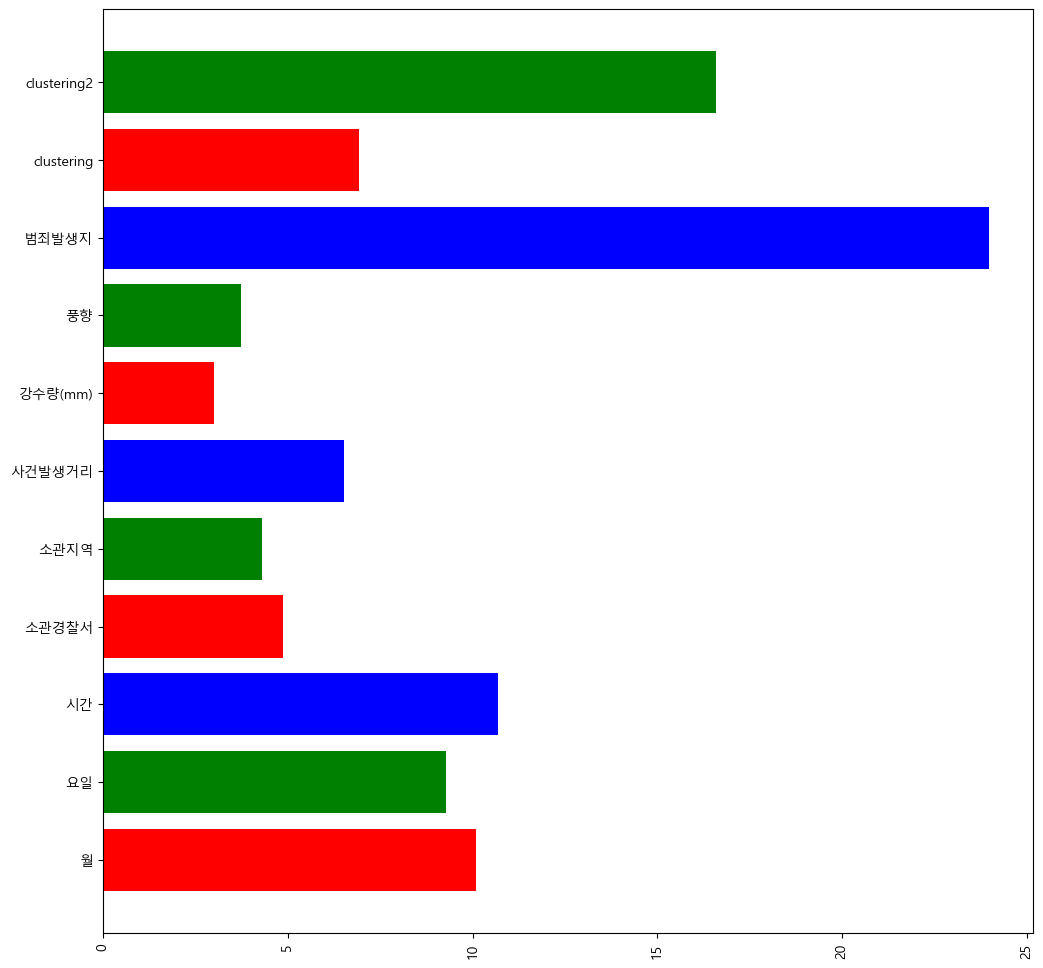

In [43]:
for result in zip(cat.feature_importances_, x_train.columns):
    print(result)

plt.figure(figsize=(12, 12))
plt.barh(x_train.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [44]:
pred = cat.predict(test_df)

url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230524_2.csv', index = False)

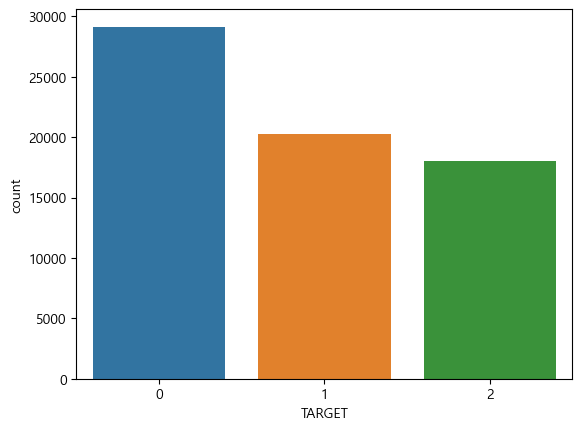

In [39]:
sns.countplot(x=y_train['TARGET'], data = y_train);

In [40]:
smote = SMOTE(random_state=13)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

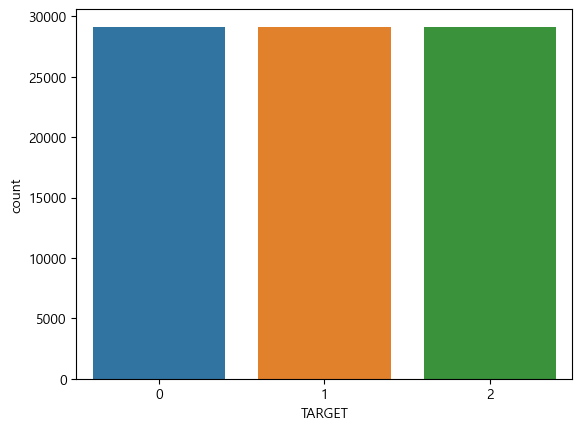

In [41]:
sns.countplot(x=y_train_over['TARGET'], data = y_train_over);

In [42]:
x_train.shape, x_train_over.shape

((67491, 11), (87447, 11))

In [45]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train_over, y_train_over,
eval_set=[(x_train_over, y_train_over), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지', 'clustering2'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0903777	test: 1.0903443	test1: 1.0905617	best: 1.0905617 (0)	total: 681ms	remaining: 34m 1s
100:	learn: 0.9547171	test: 0.9601567	test1: 0.9857672	best: 0.9857672 (100)	total: 1m 19s	remaining: 37m 51s
200:	learn: 0.9310124	test: 0.9383455	test1: 0.9838067	best: 0.9837749 (198)	total: 2m 47s	remaining: 38m 55s
300:	learn: 0.9120707	test: 0.9207204	test1: 0.9826892	best: 0.9826612 (297)	total: 4m 21s	remaining: 39m
400:	learn: 0.8884073	test: 0.8977434	test1: 0.9815627	best: 0.9815627 (400)	total: 5m 54s	remaining: 38m 16s
500:	learn: 0.8695338	test: 0.8801042	test1: 0.9812529	best: 0.9811328 (495)	total: 7m 26s	remaining: 37m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9811327701
bestIteration = 495

Shrink model to first 496 iterations.
0.5409233686955491


# 원본데이터에 ovderSampling이랑 군집화 후 원본 데이터 예측

In [2]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)
raw_df.drop_duplicates(keep='first', inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [3]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")

In [4]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [5]:
km = KMeans(n_clusters=20, random_state=13)
km_data = km.fit(raw_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])
raw_df['clustering'] = km_data.labels_
test_df['clustering'] = km_data.predict(test_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림']])

km_data = km.fit(raw_df[['소관경찰서', '소관지역', '범죄발생지']])
raw_df['clustering2'] = km_data.labels_
test_df['clustering2'] = km_data.predict(test_df[['소관경찰서', '소관지역', '범죄발생지']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [67]:
raw_df = raw_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])
test_df = test_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])

In [72]:
x_train = raw_df.drop(columns="TARGET")
y_train = raw_df[["TARGET"]]

In [73]:
smote = SMOTE(random_state=13)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

In [74]:
x_train_over

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering,clustering2
0,9,6,10,137,8.000000,2.611124,0.00000,245.000000,10,0,0
1,11,6,6,438,13.000000,3.209093,0.00000,200.000000,10,0,14
2,8,4,6,1729,47.000000,1.619597,0.00000,40.000000,6,1,15
3,5,3,6,2337,53.000000,1.921615,11.37500,225.000000,7,3,3
4,9,4,11,1439,41.000000,1.789721,0.00000,255.000000,8,0,4
...,...,...,...,...,...,...,...,...,...,...,...
109303,4,1,7,2149,38.000000,0.757947,24.10000,220.000000,9,1,12
109304,6,2,3,129,7.294661,1.143918,0.00000,72.053393,10,0,0
109305,5,4,5,1329,5.000000,0.195031,0.00000,151.710553,9,0,19
109306,6,1,11,827,16.000000,1.888008,3.28086,27.530456,10,0,2


In [75]:
y_train_over

,TARGET
0,2
1,0
2,1
3,1
4,2
...,...
109303,2
109304,2
109305,2
109306,2


In [69]:
test_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering,clustering2
0,9,0,5,927,28.0,1.570654,19.625000,165.0,10,2,16
1,5,2,3,926,28.0,1.712457,21.444444,175.0,3,1,16
2,5,3,6,1437,33.0,0.447496,25.200000,290.0,7,1,4
3,11,6,1,1739,31.0,0.878585,0.000000,285.0,7,12,15
4,10,1,10,830,15.0,0.496423,26.142857,95.0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17284,11,0,9,1138,31.0,2.500387,0.000000,345.0,10,12,13
17285,3,3,1,148,9.0,2.234593,0.000000,270.0,7,12,0
17286,10,0,9,2347,53.0,0.360005,6.857143,340.0,7,12,3
17287,9,1,4,548,13.0,3.993724,0.000000,110.0,7,12,5


In [78]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.0001, bootstrap_type ='MVS')
cat.fit(x_train_over, y_train_over,
early_stopping_rounds=70, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지', 'clustering2'],
verbose=100)

pred = cat.predict(test_df)

0:	learn: 1.0985909	total: 390ms	remaining: 19m 30s
100:	learn: 1.0964897	total: 55s	remaining: 26m 17s
200:	learn: 1.0944485	total: 2m 6s	remaining: 29m 27s
300:	learn: 1.0924496	total: 3m 19s	remaining: 29m 51s
400:	learn: 1.0904901	total: 4m 28s	remaining: 28m 59s
500:	learn: 1.0885693	total: 5m 38s	remaining: 28m 8s
600:	learn: 1.0866967	total: 6m 45s	remaining: 26m 59s
700:	learn: 1.0848539	total: 7m 54s	remaining: 25m 56s
800:	learn: 1.0830408	total: 9m 10s	remaining: 25m 10s
900:	learn: 1.0812668	total: 10m 27s	remaining: 24m 21s
1000:	learn: 1.0795424	total: 11m 37s	remaining: 23m 13s
1100:	learn: 1.0778525	total: 12m 52s	remaining: 22m 12s
1200:	learn: 1.0761961	total: 14m 6s	remaining: 21m 7s
1300:	learn: 1.0745600	total: 15m 21s	remaining: 20m 3s
1400:	learn: 1.0729571	total: 16m 34s	remaining: 18m 55s
1500:	learn: 1.0713762	total: 17m 51s	remaining: 17m 50s
1600:	learn: 1.0698354	total: 19m 7s	remaining: 16m 42s
1700:	learn: 1.0683228	total: 20m 20s	remaining: 15m 32s
1800:

In [79]:
url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230524_3.csv', index = False)

# split데이터에서 oversampling 시도해보기

In [6]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)
raw_df.drop_duplicates(keep='first', inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [7]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")


In [8]:
x = raw_df[["월", "요일", "시간", '범죄발생지', '연기/연무', '풍향', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)']]
y = raw_df[['TARGET']]
test_df = test_df[["월", "요일", "시간", '범죄발생지', '연기/연무', '풍향', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)']]

In [9]:
%%time
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.0005, bootstrap_type ='MVS')
cat.fit(x, y,
early_stopping_rounds=80, cat_features=["연기/연무", "월", "요일", "시간", "범죄발생지"],
verbose=100)

0:	learn: 1.0984889	total: 504ms	remaining: 25m 12s
100:	learn: 1.0869821	total: 34.7s	remaining: 16m 35s
200:	learn: 1.0766319	total: 1m 12s	remaining: 16m 45s
300:	learn: 1.0672240	total: 1m 50s	remaining: 16m 30s
400:	learn: 1.0587437	total: 2m 27s	remaining: 15m 57s
500:	learn: 1.0510871	total: 3m 5s	remaining: 15m 25s
600:	learn: 1.0441697	total: 3m 43s	remaining: 14m 52s
700:	learn: 1.0378606	total: 4m 21s	remaining: 14m 18s
800:	learn: 1.0321112	total: 5m 1s	remaining: 13m 46s
900:	learn: 1.0269273	total: 5m 41s	remaining: 13m 14s
1000:	learn: 1.0221280	total: 6m 22s	remaining: 12m 44s
1100:	learn: 1.0177778	total: 7m 4s	remaining: 12m 12s
1200:	learn: 1.0138426	total: 7m 44s	remaining: 11m 35s
1300:	learn: 1.0102030	total: 8m 24s	remaining: 10m 58s
1400:	learn: 1.0068310	total: 9m 5s	remaining: 10m 23s
1500:	learn: 1.0037152	total: 9m 48s	remaining: 9m 47s
1600:	learn: 1.0008757	total: 10m 30s	remaining: 9m 10s
1700:	learn: 0.9982450	total: 11m 17s	remaining: 8m 37s
1800:	learn

In [11]:
pred = cat.predict(test_df)


url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230525_1.csv', index = False)

In [15]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)
raw_df.drop_duplicates(keep='first', inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [16]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")
raw_df["소관지역"] = raw_df["소관지역"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")
test_df["소관지역"] = test_df["소관지역"].astype("int")

In [17]:
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8,2.611124,0.000000,0.0,0.00,245.0,0,0,0,0,0,0,0,차도,2
1,11,화요일,6,438,13,3.209093,0.000000,0.0,0.00,200.0,0,0,0,0,0,0,0,차도,0
2,8,일요일,6,1729,47,1.619597,0.000000,0.0,0.00,40.0,1,0,0,0,0,1,0,인도,1
3,5,월요일,6,2337,53,1.921615,11.375000,0.0,0.00,225.0,1,1,0,0,0,0,0,주거지,1
4,9,일요일,11,1439,41,1.789721,0.000000,0.0,0.00,255.0,0,0,0,0,0,0,0,주유소,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,일요일,7,336,11,3.808190,99.111111,0.0,0.00,165.0,1,0,0,0,0,0,0,차도,1
84402,8,목요일,12,2149,38,1.458490,0.000000,0.0,0.00,200.0,0,0,0,0,0,1,0,차도,0
84403,7,일요일,6,29,46,2.944913,105.888889,0.0,0.00,315.0,0,0,0,0,0,0,0,차도,0
84404,1,화요일,11,536,25,0.493679,2.285714,8.6,10.75,330.0,1,1,0,0,0,1,0,주거지,1


In [18]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [19]:
km = KMeans(n_clusters=15, random_state=13)
km_data = km.fit(raw_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '연기/연무']])
raw_df['clustering'] = km_data.labels_
test_df['clustering'] = km_data.predict(test_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '연기/연무']])

km_data = km.fit(raw_df[['소관경찰서', '소관지역', '범죄발생지']])
raw_df['clustering2'] = km_data.labels_
test_df['clustering2'] = km_data.predict(test_df[['소관경찰서', '소관지역', '범죄발생지']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [39]:
raw_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', '연기/연무'], inplace=True)
test_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', '연기/연무'], inplace=True)

In [40]:
raw_df

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,TARGET,clustering,clustering2
0,9,6,10,137,8,2.611124,0.000000,245.0,10,2,0,0
1,11,6,6,438,13,3.209093,0.000000,200.0,10,0,0,8
2,8,4,6,1729,47,1.619597,0.000000,40.0,6,1,3,11
3,5,3,6,2337,53,1.921615,11.375000,225.0,7,1,8,4
4,9,4,11,1439,41,1.789721,0.000000,255.0,8,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
84401,4,4,7,336,11,3.808190,99.111111,165.0,10,1,1,8
84402,8,1,12,2149,38,1.458490,0.000000,200.0,10,0,4,9
84403,7,4,6,29,46,2.944913,105.888889,315.0,10,0,0,10
84404,1,6,11,536,25,0.493679,2.285714,330.0,7,1,9,3


In [42]:
x = raw_df.drop(columns="TARGET")
y = raw_df[['TARGET']]

In [48]:
%%time
cat = CatBoostClassifier(n_estimators=1500, max_depth=8, random_seed=1000, learning_rate=0.005, bootstrap_type ='MVS')
cat.fit(x, y,
early_stopping_rounds=100, cat_features=["소관지역", "월", "요일", "시간", "범죄발생지", "clustering", "clustering2"],
verbose=100)

0:	learn: 1.0973811	total: 224ms	remaining: 5m 36s
100:	learn: 1.0216092	total: 22.9s	remaining: 5m 17s
200:	learn: 0.9903824	total: 45.2s	remaining: 4m 52s
300:	learn: 0.9757003	total: 1m 7s	remaining: 4m 27s
400:	learn: 0.9672974	total: 1m 38s	remaining: 4m 30s
500:	learn: 0.9624338	total: 2m 28s	remaining: 4m 55s
600:	learn: 0.9594736	total: 3m 16s	remaining: 4m 54s
700:	learn: 0.9572269	total: 3m 49s	remaining: 4m 21s
800:	learn: 0.9555252	total: 4m 23s	remaining: 3m 49s
900:	learn: 0.9540938	total: 5m 4s	remaining: 3m 22s
1000:	learn: 0.9528869	total: 5m 41s	remaining: 2m 50s
1100:	learn: 0.9516936	total: 6m 13s	remaining: 2m 15s
1200:	learn: 0.9506588	total: 6m 48s	remaining: 1m 41s
1300:	learn: 0.9496585	total: 7m 35s	remaining: 1m 9s
1400:	learn: 0.9488066	total: 8m 21s	remaining: 35.4s
1499:	learn: 0.9479568	total: 8m 58s	remaining: 0us
CPU times: total: 34min 44s
Wall time: 8min 59s


In [49]:
pred = cat.predict(test_df)


url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230525_2.csv', index = False)

(3.6169653097894674, '월')
(4.929648133829373, '요일')
(3.8334105984804148, '시간')
(2.040535128203646, '소관경찰서')
(12.338196337839534, '소관지역')
(1.4511903624116487, '사건발생거리')
(0.4025527958397942, '강수량(mm)')
(0.44004506004643873, '풍향')
(56.345162791433914, '범죄발생지')
(1.5319215063486673, 'clustering')
(13.07037197577702, 'clustering2')


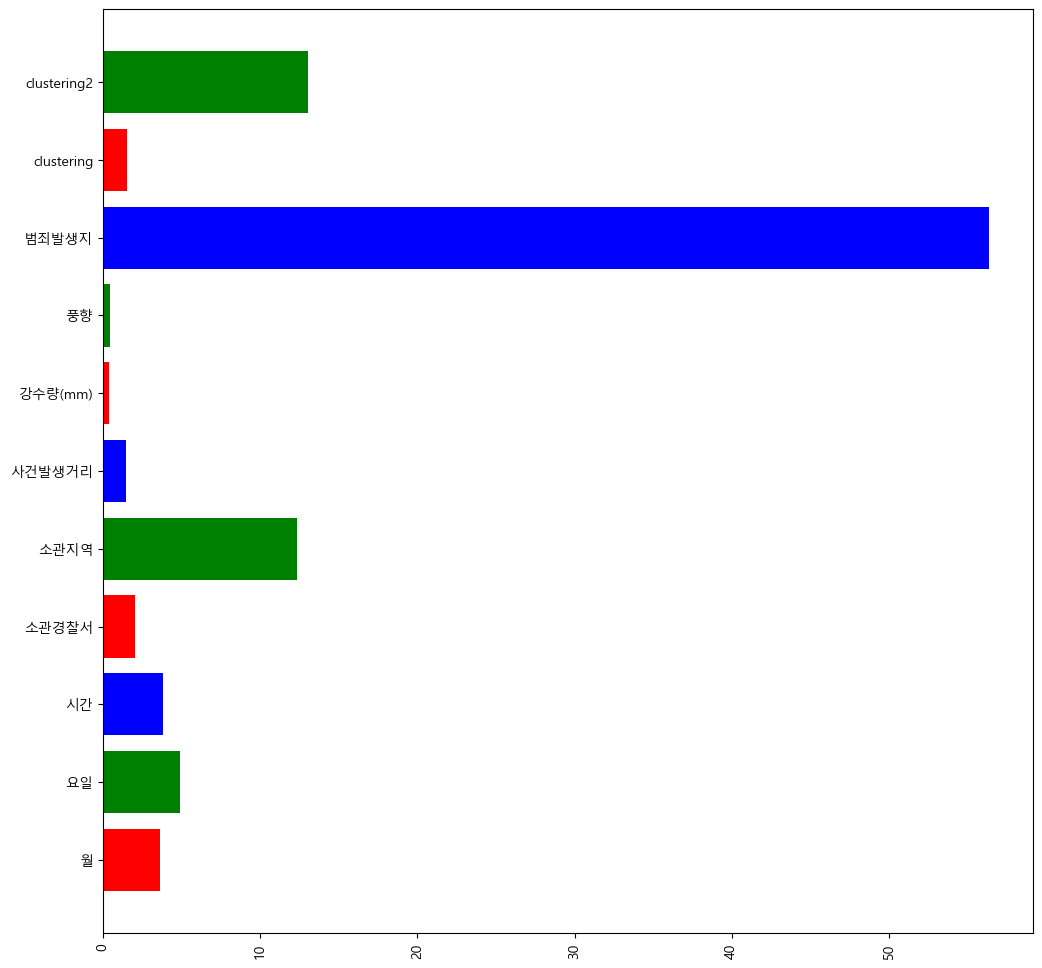

In [50]:
for result in zip(cat.feature_importances_, x.columns):
    print(result)

plt.figure(figsize=(12, 12))
plt.barh(x.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [51]:
%%time
cat = CatBoostClassifier(n_estimators=1500, max_depth=8, random_seed=1000, learning_rate=0.005, bootstrap_type ='MVS')
cat.fit(x, y,
early_stopping_rounds=100, cat_features=["소관지역", "범죄발생지", "clustering", "clustering2"],
verbose=100)

0:	learn: 1.0973942	total: 127ms	remaining: 3m 10s
100:	learn: 1.0209455	total: 19.3s	remaining: 4m 27s
200:	learn: 0.9890904	total: 44.9s	remaining: 4m 50s
300:	learn: 0.9748545	total: 1m 9s	remaining: 4m 37s
400:	learn: 0.9669863	total: 1m 30s	remaining: 4m 8s
500:	learn: 0.9623787	total: 1m 49s	remaining: 3m 38s
600:	learn: 0.9591349	total: 2m 8s	remaining: 3m 12s
700:	learn: 0.9568600	total: 2m 30s	remaining: 2m 51s
800:	learn: 0.9550524	total: 2m 53s	remaining: 2m 31s
900:	learn: 0.9534686	total: 3m 19s	remaining: 2m 12s
1000:	learn: 0.9520482	total: 3m 43s	remaining: 1m 51s
1100:	learn: 0.9507796	total: 4m 5s	remaining: 1m 28s
1200:	learn: 0.9497104	total: 4m 26s	remaining: 1m 6s
1300:	learn: 0.9486598	total: 4m 48s	remaining: 44.1s
1400:	learn: 0.9477068	total: 5m 12s	remaining: 22.1s
1499:	learn: 0.9468570	total: 5m 38s	remaining: 0us
CPU times: total: 12min 15s
Wall time: 5min 39s


In [53]:
pred = cat.predict(test_df)


url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230525_3.csv', index = False)

(2.6623892854849647, '월')
(4.105461199218287, '요일')
(3.4371366075287364, '시간')
(2.6374607897398925, '소관경찰서')
(13.870167681669878, '소관지역')
(1.8939090325832535, '사건발생거리')
(0.7635758024162217, '강수량(mm)')
(0.808409130799366, '풍향')
(53.83389428670214, '범죄발생지')
(1.918513119679732, 'clustering')
(14.069083064177388, 'clustering2')


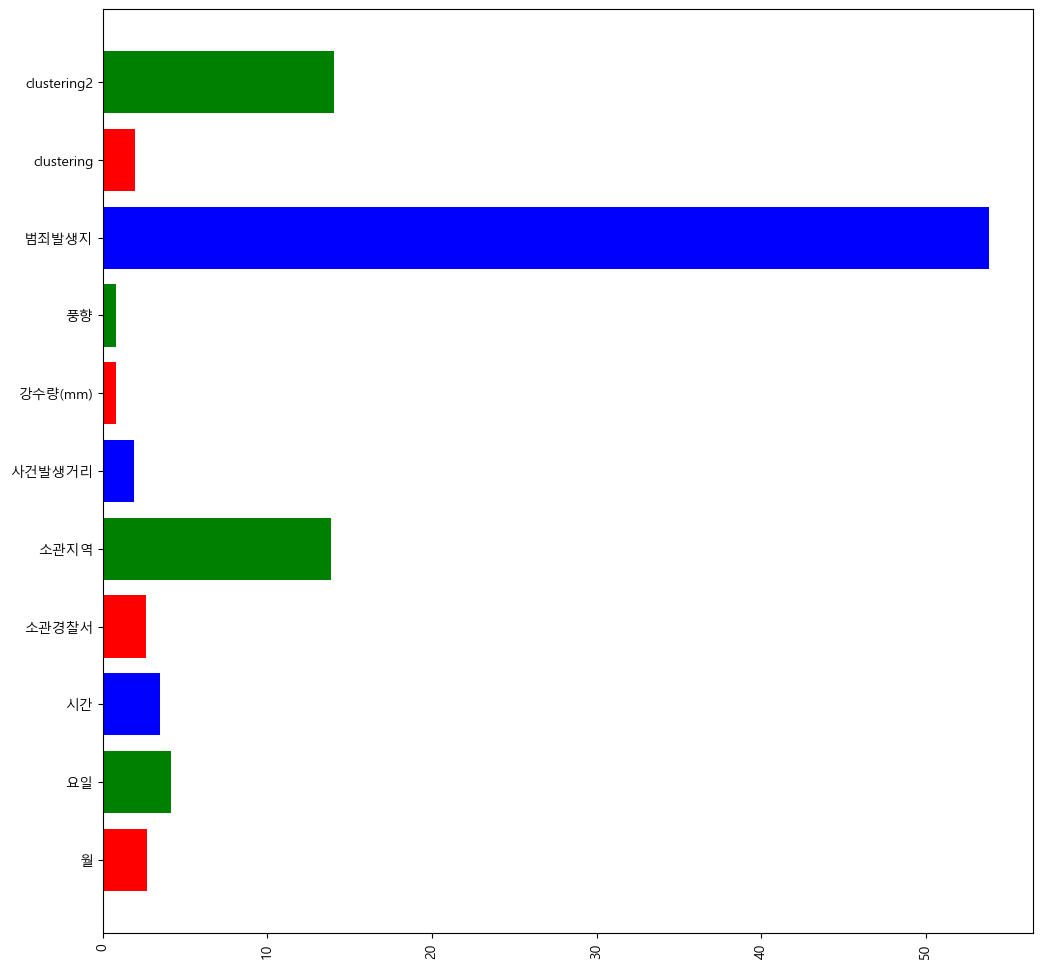

In [52]:
for result in zip(cat.feature_importances_, x.columns):
    print(result)

plt.figure(figsize=(12, 12))
plt.barh(x.columns, cat.feature_importances_, color=['r', 'g', 'b'])
plt.xticks(rotation=90)
plt.show()

In [54]:
cat.feature_importances_

array([ 2.66238929,  4.1054612 ,  3.43713661,  2.63746079, 13.87016768,
        1.89390903,  0.7635758 ,  0.80840913, 53.83389429,  1.91851312,
       14.06908306])

In [11]:
url_raw = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/train.csv"
url_test = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/test.csv"

raw_df = pd.read_csv(url_raw)
raw_df.drop(columns="ID", inplace=True)
raw_df.drop_duplicates(keep='first', inplace=True)

test_df = pd.read_csv(url_test)
test_df.drop(columns="ID", inplace=True)

In [12]:
raw_df["안개"] = raw_df["안개"].astype("int")
raw_df["짙은안개"] = raw_df["짙은안개"].astype("int")
raw_df["번개"] = raw_df["번개"].astype("int")
raw_df["진눈깨비"] = raw_df["진눈깨비"].astype("int")
raw_df["연기/연무"] = raw_df["연기/연무"].astype("int")
raw_df["눈날림"] = raw_df["눈날림"].astype("int")
raw_df["서리"] = raw_df["서리"].astype("int")
raw_df["소관지역"] = raw_df["소관지역"].astype("int")

test_df["안개"] = test_df["안개"].astype("int")
test_df["짙은안개"] = test_df["짙은안개"].astype("int")
test_df["번개"] = test_df["번개"].astype("int")
test_df["진눈깨비"] = test_df["진눈깨비"].astype("int")
test_df["연기/연무"] = test_df["연기/연무"].astype("int")
test_df["눈날림"] = test_df["눈날림"].astype("int")
test_df["서리"] = test_df["서리"].astype("int")
test_df["소관지역"] = test_df["소관지역"].astype("int")

In [13]:
make_en = LabelEncoder()


raw_df["요일"] = make_en.fit_transform(raw_df["요일"])
test_df["요일"] = make_en.transform(test_df["요일"])

raw_df["범죄발생지"] = make_en.fit_transform(raw_df["범죄발생지"])
test_df["범죄발생지"] = make_en.transform(test_df["범죄발생지"])

In [14]:
# Clustering
km = KMeans(n_clusters=20, random_state=13)
km_data = km.fit(raw_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '연기/연무']])
raw_df['clustering'] = km_data.labels_
test_df['clustering'] = km_data.predict(test_df[['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '연기/연무']])


km_data = km.fit(raw_df[['소관경찰서', '소관지역', '범죄발생지']])
raw_df['clustering2'] = km_data.labels_
test_df["clustering2"] = km_data.predict(test_df[['소관경찰서', '소관지역', '범죄발생지']])

C:\Users\xswer\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [6]:
raw_df = raw_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])
test_df = test_df.drop(columns=['안개', '짙은안개', '번개', '진눈깨비','서리','눈날림', '강설량(mm)', '적설량(cm)', "연기/연무"])

In [7]:
x = raw_df.drop(columns='TARGET')
y = raw_df[['TARGET']]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [82]:
x_train

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),풍향,범죄발생지,clustering,clustering2
15947,6,4,2,640,21,1.148643,109.714286,90.0,10,0,18
79613,10,5,6,149,9,3.518338,0.000000,100.0,9,0,0
59032,9,5,7,228,24,2.213899,31.000000,295.0,9,0,17
28768,3,3,12,226,24,2.058993,0.000000,270.0,10,0,17
17907,8,6,11,239,12,1.872185,137.444444,290.0,10,5,17
...,...,...,...,...,...,...,...,...,...,...,...
36800,8,3,11,529,25,1.829042,0.000000,70.0,7,0,5
25325,3,2,3,946,26,2.273369,33.625000,230.0,8,1,19
65716,8,2,10,739,20,2.017418,0.000000,90.0,10,6,8
33636,5,5,10,750,22,4.044182,0.000000,235.0,7,0,8


In [9]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지', 'clustering2'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0889030	test: 1.0888741	test1: 1.0889360	best: 1.0889360 (0)	total: 426ms	remaining: 21m 17s
100:	learn: 0.9460979	test: 0.9528923	test1: 0.9626230	best: 0.9626230 (100)	total: 27.9s	remaining: 13m 20s
200:	learn: 0.9291362	test: 0.9461449	test1: 0.9608953	best: 0.9608929 (198)	total: 1m 4s	remaining: 15m 2s
300:	learn: 0.9119291	test: 0.9400794	test1: 0.9599505	best: 0.9599505 (300)	total: 1m 43s	remaining: 15m 30s
400:	learn: 0.8887595	test: 0.9293012	test1: 0.9588371	best: 0.9588211 (397)	total: 2m 36s	remaining: 16m 55s
500:	learn: 0.8685727	test: 0.9208680	test1: 0.9586184	best: 0.9585204 (494)	total: 3m 29s	remaining: 17m 23s
600:	learn: 0.8477886	test: 0.9133522	test1: 0.9584238	best: 0.9583388 (594)	total: 4m 16s	remaining: 17m 3s
700:	learn: 0.8298368	test: 0.9070488	test1: 0.9582283	best: 0.9581506 (690)	total: 5m 14s	remaining: 17m 12s
800:	learn: 0.8128462	test: 0.9013844	test1: 0.9581902	best: 0.9579765 (758)	total: 6m 1s	remaining: 16m 32s
Stopped by overfitti

In [84]:
pred = cat.predict(test_df)


url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230526_1.csv', index = False)

In [12]:
cat = CatBoostClassifier(n_estimators=3000, max_depth=10, random_seed=1000, learning_rate=0.04, bootstrap_type ='MVS')
cat.fit(x_train, y_train,
eval_set=[(x_train, y_train), (x_test, y_test)],
early_stopping_rounds=50, cat_features=["월", "요일", "시간", 'clustering', '범죄발생지', 'clustering2'],
verbose=100)

pred = cat.predict(x_test)
print(accuracy_score(y_test, pred))
cat_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()

0:	learn: 1.0889030	test: 1.0888741	test1: 1.0889360	best: 1.0889360 (0)	total: 268ms	remaining: 13m 22s
100:	learn: 0.9460979	test: 0.9528923	test1: 0.9626230	best: 0.9626230 (100)	total: 27.4s	remaining: 13m 5s
200:	learn: 0.9291362	test: 0.9461449	test1: 0.9608953	best: 0.9608929 (198)	total: 1m 3s	remaining: 14m 46s
300:	learn: 0.9119291	test: 0.9400794	test1: 0.9599505	best: 0.9599505 (300)	total: 1m 42s	remaining: 15m 17s
400:	learn: 0.8887595	test: 0.9293012	test1: 0.9588371	best: 0.9588211 (397)	total: 2m 25s	remaining: 15m 46s
500:	learn: 0.8685727	test: 0.9208680	test1: 0.9586184	best: 0.9585204 (494)	total: 3m 23s	remaining: 16m 54s
600:	learn: 0.8477886	test: 0.9133522	test1: 0.9584238	best: 0.9583388 (594)	total: 4m 7s	remaining: 16m 26s
700:	learn: 0.8298368	test: 0.9070488	test1: 0.9582283	best: 0.9581506 (690)	total: 4m 51s	remaining: 15m 56s


CatBoostError: bad allocation

In [ ]:
pred = cat.predict(test_df)


url_report = "https://raw.githubusercontent.com/DataResolvere/Project/main/Dacon_Crime/sample_submission.csv"
submit = pd.read_csv(url_report)
submit['TARGET'] = pred

submit.to_csv('submit_20230526_2.csv', index = False)